### Problem Statement
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.

    Data Cleaning
    Exploratory Data Analysis
    Data Pre-processing
    Model Building
    Model Evaluation
    Selecting the best model

In [146]:
#importing the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## 2. Data Used
Here we are using the we scraped data from different websites like Cardheko,Car24 Etc

In [148]:
#loading the data set
df= pd.read_csv('Car_DB_clean.csv')
df.head()

,Unnamed: 0,Brand,Model,Variant,Gear,Engine(CC),Max_Power(BHP),Torque(Nm),Mileage,Fuel,Color,Owner,Seats,Location,Insurance,Price,Year
0,0,Datsun,RediGO,1.0 T Option,Manual,999,67,91,22.5,Petrol,Silver,1,5,Bangalore,Third Party insurance,328500,2017
1,1,Ford,Ecosport,1.5 DV5 MT Titanium,Manual,1498,89,204,22.7,Diesel,None,1,5,Bangalore,Third Party insurance,605865,2014
2,2,Ford,Ecosport,1.5 DV5 MT Titanium,Manual,1498,89,204,22.7,Diesel,None,1,5,Bangalore,Third Party insurance,584000,2014
3,3,Ford,Ecosport,Titanium Diesel,Manual,1498,99,215,21.7,Diesel,None,2,5,Bangalore,Third Party insurance,622500,2014
4,4,Ford,Fiesta,1.4 Duratorq LXI,Manual,1388,67,160,18.6,Diesel,None,2,5,Bangalore,Third Party insurance,256000,2012


In [140]:
df.shape

(2394, 17)

## Data understanding and exploration:

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 17 columns):
Unnamed: 0        2394 non-null int64
Brand             2394 non-null object
Model             2394 non-null object
Variant           2394 non-null object
Gear              2394 non-null object
Engine(CC)        2394 non-null object
Max_Power(BHP)    2394 non-null int64
Torque(Nm)        2394 non-null object
Mileage           2394 non-null object
Fuel              2394 non-null object
Color             2394 non-null object
Owner             2394 non-null int64
Seats             2394 non-null object
Location          2394 non-null object
Insurance         2394 non-null object
Price             2394 non-null object
Year              2394 non-null object
dtypes: int64(3), object(14)
memory usage: 318.0+ KB


## Data cleaning 

#### Checking null values

In [150]:
df.isnull().sum()

Unnamed: 0        0
Brand             0
Model             0
Variant           0
Gear              0
Engine(CC)        0
Max_Power(BHP)    0
Torque(Nm)        0
Mileage           0
Fuel              0
Color             0
Owner             0
Seats             0
Location          0
Insurance         0
Price             0
Year              0
dtype: int64

In [151]:
df.dropna(how='all',inplace =True)
#Droping the null values Gear column
df.dropna(subset=['Color'],inplace = True)

In [108]:
df.isnull().sum()

Brand             0
Model             0
Variant           0
Gear              0
Engine(CC)        0
Max_Power(BHP)    0
Torque(Nm)        0
Mileage           0
Fuel              0
Color             0
Owner             0
Seats             0
Location          0
Insurance         0
Price             0
Year              0
dtype: int64

In [153]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [55]:
#spliting the sting by space 
df['Model'] = df['Brand'].str.split(' ').str[2]

In [56]:
df['Brand'] = df['Brand'].str.split(' ').str[1]

In [115]:
df['Owner'] = df['Owner'].str.replace('No Of Owner(s)','')
df['KiloMeter'] = df['KiloMeter'].str.replace('Kms','')

df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Max_Power(BHP)'] = df['Max_Power'].str.replace('bhp','')
df['Engine(CC)'] = df['Engine'].str.replace(' cc','')
df['Torque(Nm)'] = df['Torque'].str.replace('Nm','')

In [58]:
df['Torque(Nm)'] = df['Torque(Nm)'].str.extract('(\d+)', expand=False)

In [59]:
#Remove all non numeric charcters from data frame
df['Owner'] = df['Owner'].str.extract('(\d+)', expand=False)
df['Max_Power(BHP)'] = df['Max_Power(BHP)'].str.extract('(\d+)', expand=False)

In [253]:
#df['Price'] = df['Price'].str.replace(',','')

df['Torque(Nm)'] = df['Torque(Nm)'].str.replace('(11.2)','')

In [61]:
df.drop(['Engine','Torque','Max_Power'], axis=1, inplace=True)

In [62]:
df['Month']=df['Reg_year'].str.split('-').str[1]

In [63]:
column=['Brand', 'Model', 'Variant','Year' 'Gear','Engine(CC)', 'Max_Power(BHP)','Torque(Nm)','Mileage','Fuel','Color','Owner','Seats','Location', 'Insurance','Price']
  
# create the new index for columns
df=df.reindex(column, axis='columns')

In [39]:
#Remove all non numeric charcters from data frame
df['Seats'] = df['Seats'].str.extract('(\d+)', expand=False)

In [27]:
#Remove all non numeric charcters from data frame
df['Color'] = df['Color'].str.extract('(\D+)', expand=False)

In [70]:
#While scraping the data some the cars seats fatched other values so we removing with the condition 
df['Seats'] = np.where(df['Seats'] >='8', '6','5')

In [73]:
df['Color'].fillna('None', inplace=True)

In [71]:
df['Seats'].fillna('None', inplace=True)

In [93]:
df['Owner'].fillna('1', inplace=True)

In [69]:
df['Gear'] = np.where(df['Gear'] =='Automatic', 'Automatic','Manual')

In [35]:
df['Insurance'] = np.where(df['Insurance'] =='Third Party insurance', 'Third Party insurance','Not Available')

In [425]:
#df.to_csv('CAR_DB_cleaned.csv')

In [514]:
df =pd.read_csv("CAR_DB_cleaned.csv")
df.head()

,Unnamed: 0,Brand,Model,Variant,Gear,Engine(CC),Max_Power(BHP),Torque(Nm),Mileage,Fuel,Color,Owner,Seats,Location,Insurance,Price,Year
0,0,Datsun,RediGO,1.0 T Option,Manual,999,67,91.0,22.5,Petrol,Silver,1,5,Bangalore,Third Party insurance,328500,2017
1,1,Ford,Ecosport,1.5 DV5 MT Titanium,Manual,1498,89,204.0,22.7,Diesel,None,1,5,Bangalore,Third Party insurance,605865,2014
2,2,Ford,Ecosport,1.5 DV5 MT Titanium,Manual,1498,89,204.0,22.7,Diesel,None,1,5,Bangalore,Third Party insurance,584000,2014
3,3,Ford,Ecosport,Titanium Diesel,Manual,1498,99,215.0,21.7,Diesel,None,2,5,Bangalore,Third Party insurance,622500,2014
4,4,Ford,Fiesta,1.4 Duratorq LXI,Manual,1388,67,160.0,18.6,Diesel,None,2,5,Bangalore,Third Party insurance,256000,2012


In [515]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [516]:
df.isnull().sum()

Brand             0
Model             0
Variant           0
Gear              0
Engine(CC)        0
Max_Power(BHP)    0
Torque(Nm)        0
Mileage           0
Fuel              0
Color             0
Owner             0
Seats             0
Location          0
Insurance         0
Price             0
Year              0
dtype: int64

**Exploratory data Analysis**

#### Univariant Analysis

Maruti        1010
Hyundai        427
Honda          294
Mahindra       191
Ford           150
Renault         87
Tata            77
Toyota          70
Volkswagen      43
Skoda           10
Nissan           9
MG               5
Datsun           5
BMW              4
Mitsubishi       3
Kia              3
Chevrolet        2
Jeep             1
Name: Brand, dtype: int64


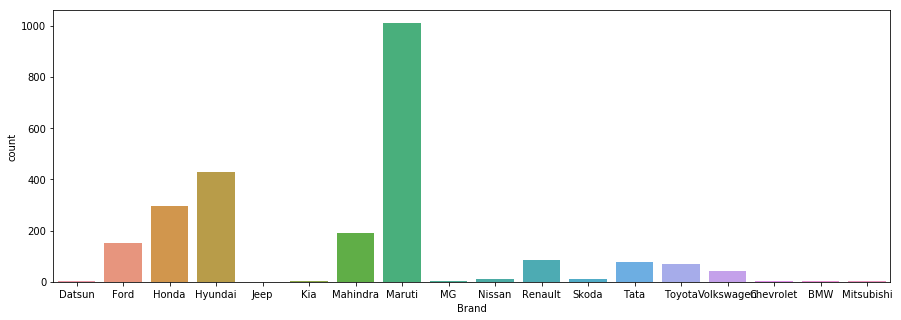

In [517]:
fig=plt.figure(figsize=(15,5))
sns.countplot(df['Brand'])
print(df['Brand'].value_counts())
plt.show()

Descrpition: Highest number of hosues sale Identifies the general zoning classification of the sale "Residential Low Density" 

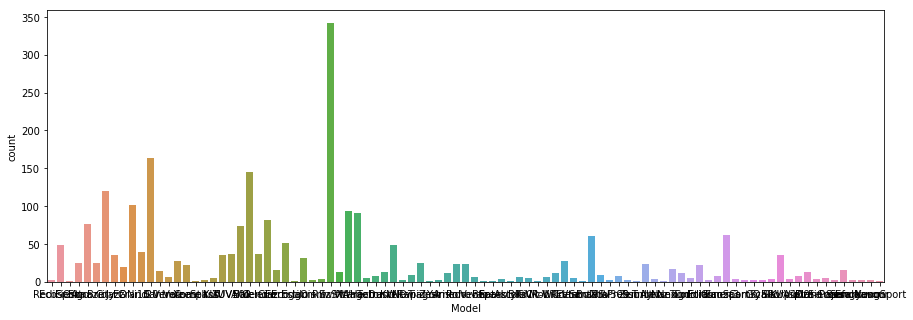

In [518]:
fig=plt.figure(figsize=(15,5))
sns.countplot(df['Model'])
plt.show()

Manual       2109
Automatic     268
UP16            4
DL9C            4
DL10            2
DL12            2
DL7C            2
Name: Gear, dtype: int64


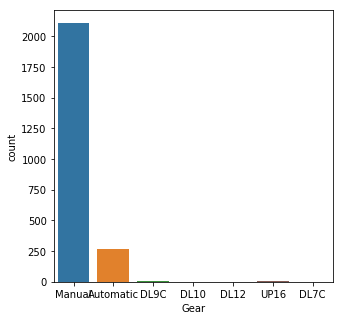

In [519]:
fig=plt.figure(figsize=(5,5))
sns.countplot(df['Gear'])
print(df['Gear'].value_counts())
plt.show()

None                                      547
 other                                    516
White                                     289
Other                                     241
Grey                                      178
Silver                                    169
FWD                                       154
Red                                        87
Blue                                       59
Brown                                      20
#NAME?                                     18
CVT                                        14
Maroon                                     12
Black                                      10
AWD                                        10
RWD                                         8
WD                                          8
 WD                                         6
Orange                                      5
Golden Brown                                4
????                                        4
Five other Manual Transmission Gea

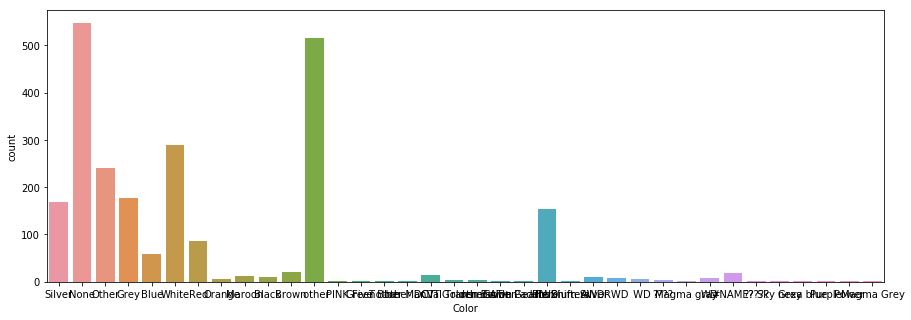

In [520]:
fig=plt.figure(figsize=(15,5))
sns.countplot(df['Color'])
print(df['Color'].value_counts())
plt.show()

Petrol    1325
Diesel    1045
CNG         20
LPG          1
Name: Fuel, dtype: int64


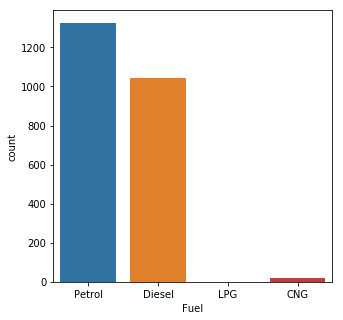

In [521]:
fig=plt.figure(figsize=(5,5))
sns.countplot(df['Fuel'])
print(df['Fuel'].value_counts())
plt.show()

1    1982
2     382
3      20
4       7
Name: Owner, dtype: int64


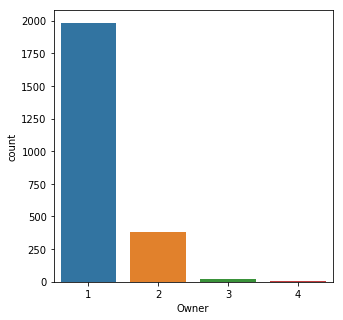

In [522]:
fig=plt.figure(figsize=(5,5))
sns.countplot(df['Owner'])
print(df['Owner'].value_counts())
plt.show()

Not Available            1309
Third Party insurance    1082
Name: Insurance, dtype: int64


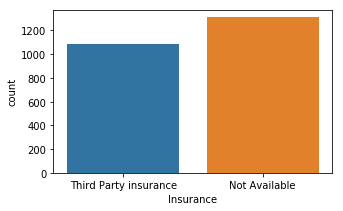

In [523]:
fig=plt.figure(figsize=(5,3))
sns.countplot(df['Insurance'])
print(df['Insurance'].value_counts())
plt.show()

Petrol    1325
Diesel    1045
CNG         20
LPG          1
Name: Fuel, dtype: int64


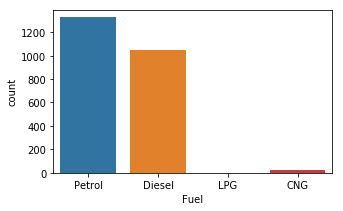

In [524]:
fig=plt.figure(figsize=(5,3))
sns.countplot(df['Fuel'])
print(df['Fuel'].value_counts())
plt.show()

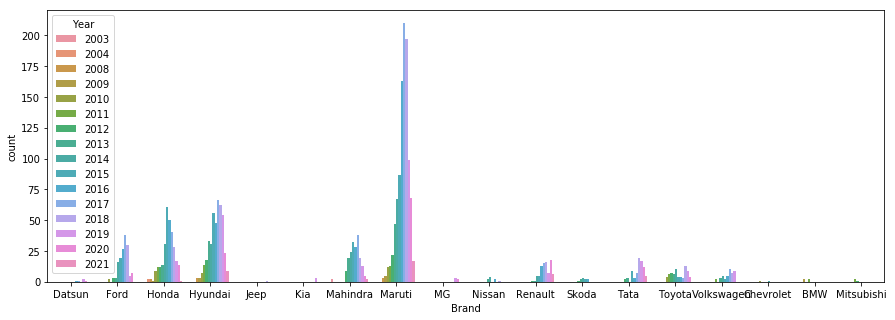

In [525]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x='Brand',hue='Year',  data=df)
plt.show()

In [526]:
#df['Price']=df['Price'].str.replace(",","")

In [527]:
df['Price']=pd.to_numeric(df['Price'])

In [528]:
df['Price']=pd.to_numeric(df['Price'])
df['Engine(CC)']=pd.to_numeric(df['Engine(CC)'])
df['Torque(Nm)']=pd.to_numeric(df['Torque(Nm)'])
df['Mileage']=pd.to_numeric(df['Mileage'])
df['Max_Power(BHP)']=pd.to_numeric(df['Max_Power(BHP)'])
df['Owner']=pd.to_numeric(df['Owner'])
df['Year']=pd.to_numeric(df['Year'])


In [529]:
#df['Torque(Nm)']=df['Torque(Nm)'].str.replace('kgm','')

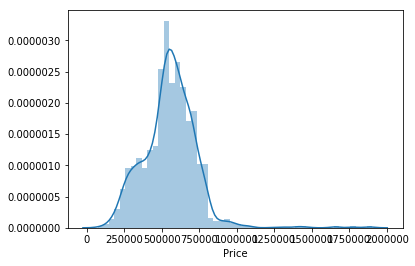

In [530]:
sns.distplot(df["Price"])

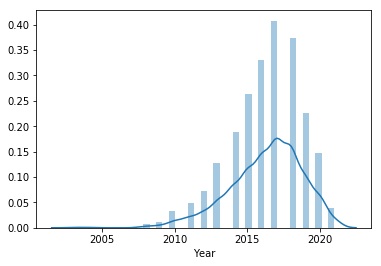

In [531]:
sns.distplot(df["Year"])

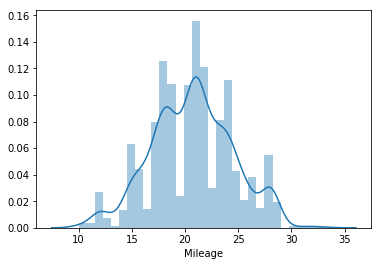

In [532]:
sns.distplot(df["Mileage"]);

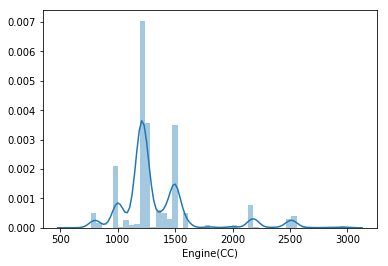

In [533]:
sns.distplot(df["Engine(CC)"]);

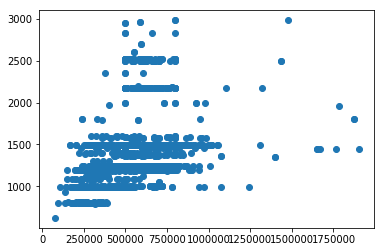

In [534]:
plt.scatter(df['Price'],df['Engine(CC)'])

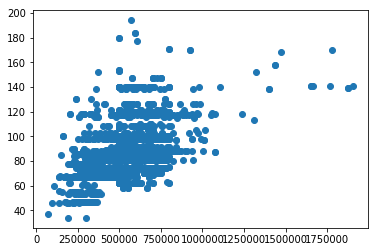

In [535]:
plt.scatter(df['Price'],df['Max_Power(BHP)'])

Observation : price of the Car is increase and power of the engine also inceases

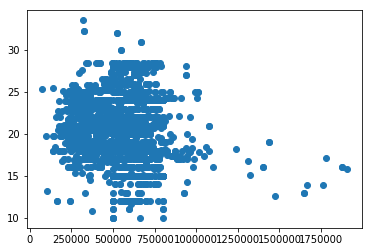

In [536]:
plt.scatter(df['Price'],df['Mileage'])

In [ ]:
Observation : We clearly sees that as car price increases mileage of the car dicreases 

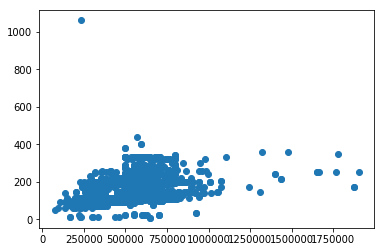

In [537]:
plt.scatter(df['Price'],df['Torque(Nm)'])

In [538]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine(CC),2391.0,1341.902551,356.462453,624.0,1197.0,1248.00,1493.0,2982.00
Max_Power(BHP),2391.0,87.060644,20.001676,34.0,74.0,83.00,98.0,194.00
Torque(Nm),2391.0,156.699440,65.313011,7.0,113.0,140.00,200.0,1061.00
Mileage,2391.0,20.689055,3.824123,10.0,18.0,20.92,23.1,33.54
Owner,2391.0,1.185278,0.430491,1.0,1.0,1.00,1.0,4.00
Price,2391.0,553593.686324,178677.112628,74500.0,450000.0,551040.00,650000.0,1903500.00
Year,2391.0,2016.298620,2.512128,2003.0,2015.0,2017.00,2018.0,2021.00


Observation:  maximum car engine CC in this data set is 2982 cc and lowset is 624 cc and power is 194 BHP and lowset is 34 BHP
 

#### Encoding the Cateogorical variables 

In [666]:
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['Variant'] = le.fit_transform(df['Variant'])
df['Gear'] = le.fit_transform(df['Gear'])
df['Fuel'] = le.fit_transform(df['Fuel'])
df['Color'] = le.fit_transform(df['Color'])
df['Insurance'] = le.fit_transform(df['Insurance'])
df['Seats'] = le.fit_transform(df['Seats'])
df['Location'] = le.fit_transform(df['Location'])



In [667]:
df.head()

,Brand,Model,Variant,Year,Gear,Engine(CC),Max_Power(BHP),Torque(Nm),Mileage,Fuel,Color,Owner,Seats,Location,Insurance,Price
0,2,57,16,2017,5,999,67,91.0,22.5,3,30,1,0,1,1,328500
1,3,26,95,2014,5,1498,89,204.0,22.7,1,21,1,0,1,1,605865
2,3,26,95,2014,5,1498,89,204.0,22.7,1,21,1,0,1,1,584000
3,3,26,379,2014,5,1498,99,215.0,21.7,1,21,2,0,1,1,622500
4,3,33,85,2012,5,1388,67,160.0,18.6,1,21,2,0,1,1,256000


In [541]:
df.to_csv('Car_Encoded.csv')

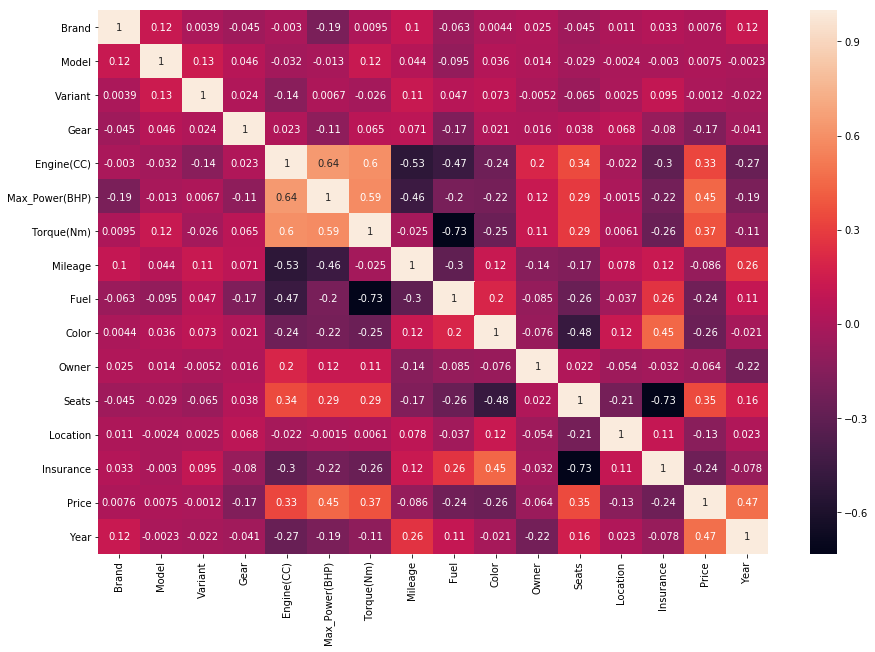

In [542]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap, annot=True)
plt.show()

In [543]:
#to display the
corr_matrix=df.corr()

#please find the top 10 positive relation with dependet variable SALES PRICE 
corr_matrix['Price'].sort_values(ascending = False)

Price             1.000000
Year              0.472070
Max_Power(BHP)    0.451465
Torque(Nm)        0.373768
Seats             0.345486
Engine(CC)        0.334082
Brand             0.007629
Model             0.007487
Variant          -0.001235
Owner            -0.064432
Mileage          -0.086237
Location         -0.132778
Gear             -0.168256
Fuel             -0.237117
Insurance        -0.243964
Color            -0.255690
Name: Price, dtype: float64

Observation :

Depedent varaible Price and independent variable Year have the positve corealtion 47%

Car seaats and price of the car have positive relation of 35%
Max_power and price of the car have positive corelation with price of the car 45%
Engine CC 33% and torque 35% positive corealtion with the car price

Independet variables variant and Owner, Mileage have negative corelation with Dependent variable Car price 



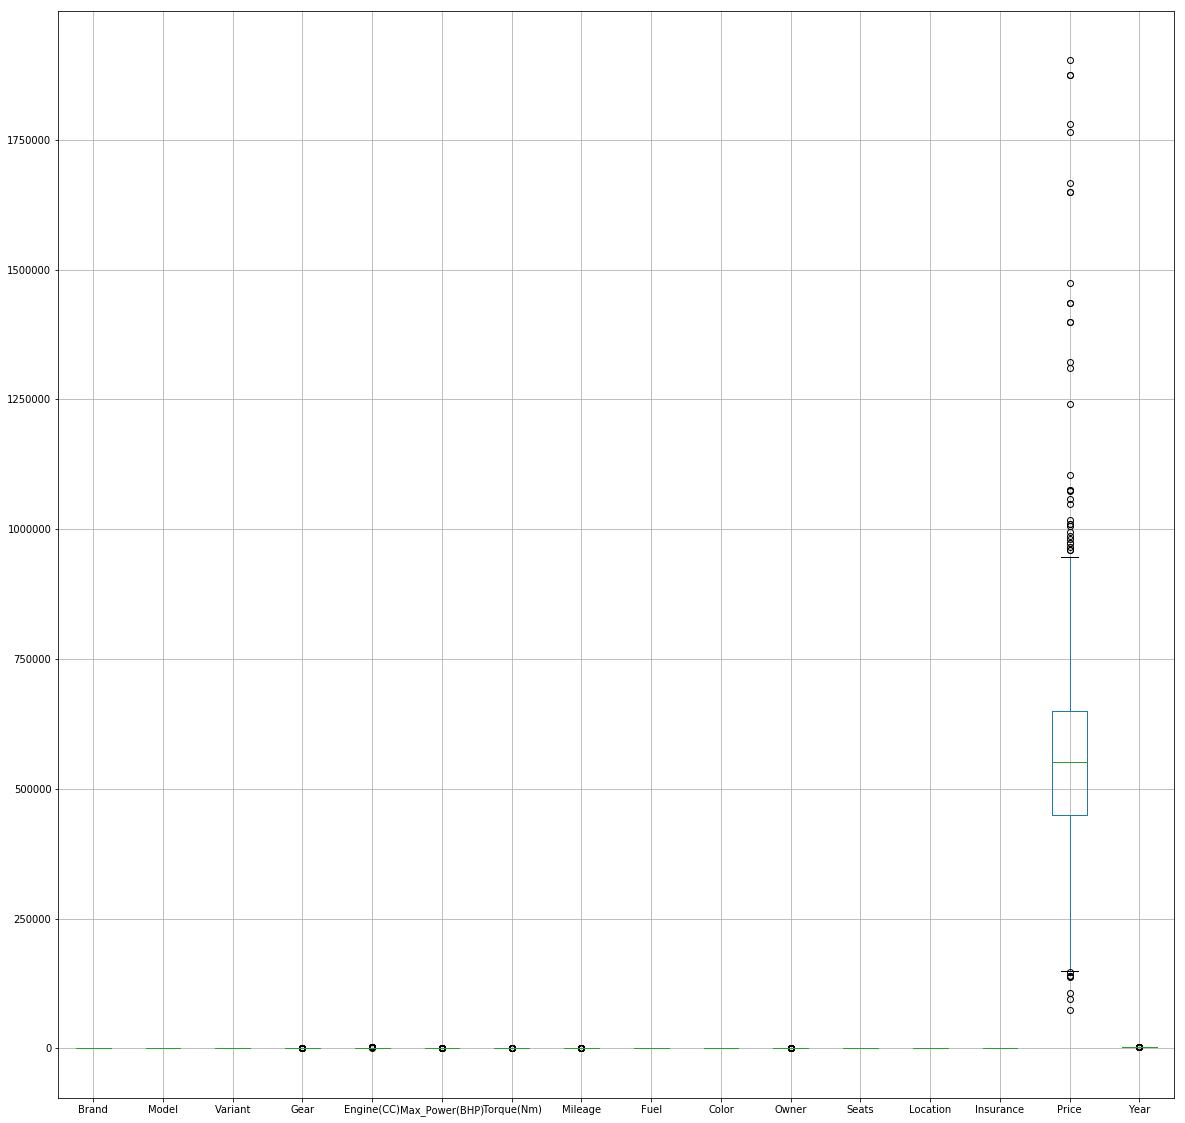

In [544]:
#plot histogram
df.boxplot(figsize=(20,20))
plt.show()

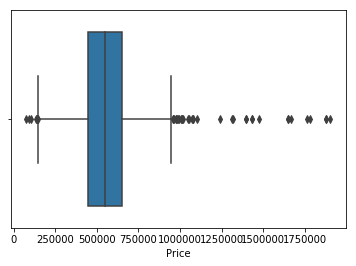

In [599]:
sns.boxplot(df['Price'])
plt.show()

In [546]:
df1=df.select_dtypes(include=None, exclude=object)

In [547]:
df1.columns

Index(['Brand', 'Model', 'Variant', 'Gear', 'Engine(CC)', 'Max_Power(BHP)',
       'Torque(Nm)', 'Mileage', 'Fuel', 'Color', 'Owner', 'Seats', 'Location',
       'Insurance', 'Price', 'Year'],
      dtype='object')

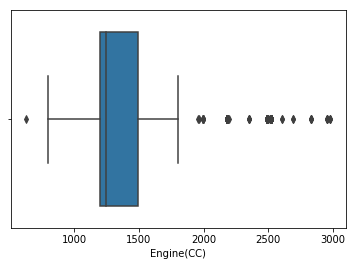

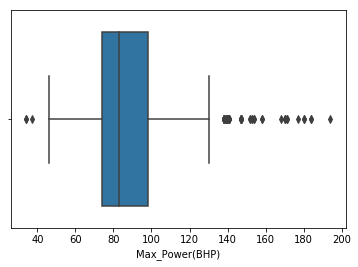

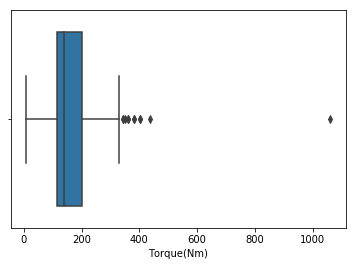

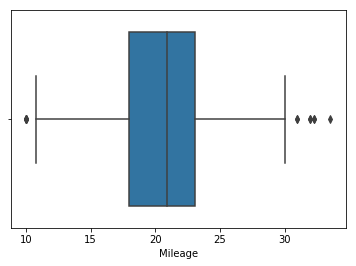

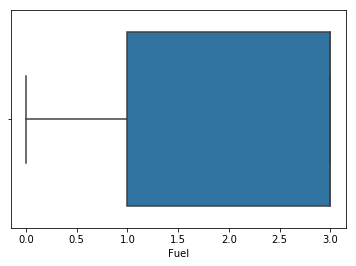

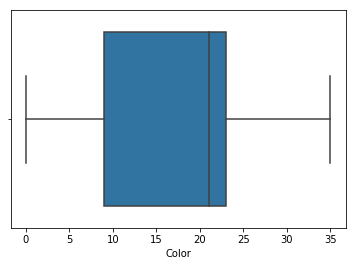

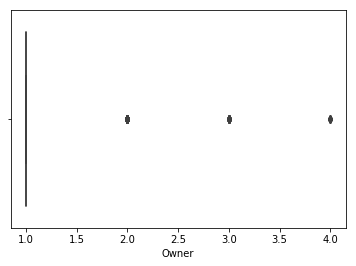

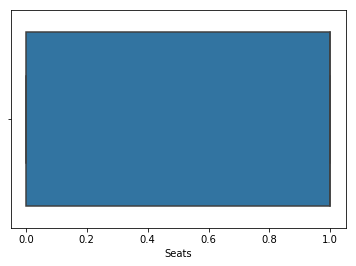

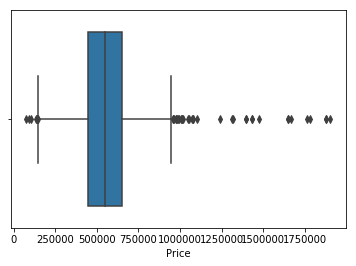

In [548]:
columns =['Engine(CC)',
       'Max_Power(BHP)', 'Torque(Nm)', 'Mileage', 'Fuel', 'Color', 'Owner',
       'Seats','Price']
        
for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

In [549]:
column=['Brand', 'Model', 'Variant','Year', 'Gear','Engine(CC)', 'Max_Power(BHP)','Torque(Nm)','Mileage','Fuel','Color','Owner','Seats','Location', 'Insurance','Price']
  
# create the new index for columns
df=df.reindex(column, axis='columns')

In [550]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)


[[1.77271893 0.31720381 1.67100078 ... 1.55045014 1.09990757 1.26004259]
 [1.49559758 0.71386507 1.13920661 ... 1.55045014 1.09990757 0.29260741]
 [1.49559758 0.71386507 1.13920661 ... 1.55045014 1.09990757 0.17021024]
 ...
 [1.27561586 0.98240954 0.36866547 ... 0.87556824 0.9091673  0.5396689 ]
 [0.44425182 0.78284782 0.15639713 ... 0.87556824 0.9091673  0.5396689 ]
 [1.49559758 1.3790708  0.7658282  ... 0.87556824 0.9091673  0.30000987]]


In [551]:
threshold = 3
print(np.where(z > 3))

(array([  76,   79,   90,  120,  120,  121,  127,  140,  151,  200,  274,
        275,  276,  323,  367,  428,  550,  550,  553,  556,  582,  586,
        587,  588,  597,  597,  597,  616,  617,  914, 1012, 1012, 1012,
       1012, 1014, 1125, 1129, 1130, 1132, 1132, 1132, 1145, 1159, 1176,
       1177, 1203, 1324, 1324, 1327, 1350, 1353, 1358, 1372, 1393, 1417,
       1423, 1427, 1435, 1435, 1435, 1455, 1463, 1475, 1495, 1497, 1509,
       1509, 1509, 1518, 1546, 1549, 1549, 1549, 1551, 1561, 1575, 1576,
       1577, 1583, 1585, 1586, 1595, 1600, 1615, 1616, 1620, 1628, 1630,
       1639, 1640, 1647, 1647, 1661, 1666, 1677, 1686, 1693, 1694, 1698,
       1699, 1699, 1700, 1706, 1708, 1713, 1717, 1730, 1738, 1759, 1763,
       1764, 1766, 1766, 1766, 1793, 1810, 1811, 1837, 1958, 1958, 1961,
       1984, 1987, 1992, 2006, 2027, 2051, 2057, 2061, 2069, 2069, 2069,
       2089, 2097, 2109, 2129, 2131, 2143, 2143, 2143, 2152, 2180, 2183,
       2183, 2183, 2185, 2195, 2209, 2210, 2211, 2

### Data Preparation:

In [580]:
#Spliting the dataset dependent and independent sets
X = df.drop(['Price'],axis=1)
y = df['Price']

In [600]:
#Spliting the dataset dependent and independent sets
X = df.drop(['Price','Color','Seats','Insurance'],axis=1)
y = df['Price']

In [601]:
print(X.shape,y.shape)

(2391, 12) (2391,)


In [602]:
# scaling the features
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Brand', 'Model', 'Variant', 'Year', 'Gear', 'Engine(CC)',
       'Max_Power(BHP)', 'Torque(Nm)', 'Mileage', 'Fuel', 'Owner', 'Location'],
      dtype='object')

In [613]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size = 0.2, random_state=100)

### Model Building and Evaluation:
#### Building the first model with all the features

In [660]:
Model = []
MMSE=[]
MSE=[]
RMSE=[]
R_Square=[]

In [661]:
# Linear Regression Model


lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print("R Square",r2_score(y_test, y_pred))





r_score= lm.score(X,y)
R_Square.append(r_score)
Model.append("Linear Regression")

from sklearn.metrics import confusion_matrix,classification_report

# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE  : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



MMSE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Square 0.6110459402787973
MAE  :  79742.20406072738
MSE  :  12939206654.562105
RMSE :  113750.63364466198


#### we are getting approx. 63% r-squared with all the variables

In [662]:
# SVR model 
from sklearn.svm import LinearSVR
Model_SVR = LinearSVR()

Model_SVR.fit(X_train, y_train)
yhat_SVR = model_SVR.predict(X_test)
r_score= Model_SVR.score(X,y)
print("R Square",r2_score(y_test, yhat_SVR))

#print('Predicted: %s' % yhat_SVR)


print("MAE  : ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE  : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Model.append('SVRRegressor')
R_Square.append(r_score)
MMSE.append(metrics.mean_absolute_error(y_test, yhat_SVR))
MSE.append(metrics.mean_squared_error(y_test, yhat_SVR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yhat_SVR)))

R Square -9.243175444568415
MAE  :  79742.20406072738
MSE  :  12939206654.562105
RMSE :  113750.63364466198


In [663]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(X_train, y_train)
y_predRFR =RFR.predict(X_test)

r_score= RFR.score(X,y)
print("R Square",r2_score(y_test, y_predRFR))


# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_predRFR))
print("MSE  : ", metrics.mean_squared_error(y_test, y_predRFR))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

Model.append('RandomForestRegressor')
R_Square.append(r_score)
MMSE.append(metrics.mean_absolute_error(y_test, y_predRFR))
MSE.append(metrics.mean_squared_error(y_test, y_predRFR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

R Square 0.8209165423944185
MAE  :  51144.246118898496
MSE  :  5957510426.894809
RMSE :  77184.91061661475


#### we are getting approx. 82% r-squared with all the variables

In [664]:
AccuracyTable=pd.DataFrame({'Model':Model,
                        'MMSE':MMSE,
                        'MSE': MSE, 
                        'RMSE': RMSE,
                        'R_score':R_Square
                       })
AccuracyTable

,Model,MMSE,MSE,RMSE,R_score
0,Linear Regression,79742.204061,1.293921e+10,113750.633645,0.611957
1,SVRRegressor,554520.009231,3.407563e+11,583743.389932,-9.537075
2,RandomForestRegressor,51144.246119,5.957510e+09,77184.910617,0.932879


In [ ]:
### We got highest accuracy in Random forest model so we Saving that model 

In [ ]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(RFR, 'model_RFR.pkl')
  
# Load the model from the file
SVR_joblib = joblib.load('model_RFR.pkl') 
  
# Use the loaded model to make predictions
#SVR_joblib.predict(x_test)